<a href="https://colab.research.google.com/github/agrimkapoor/Machine-Learning-Lab-Sem-5-Agrim-Kapoor-23-CS-032/blob/main/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC #sklearn library --> svm module-->SVC class
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import warnings

# Suppress harmless warnings for cleaner output
warnings.filterwarnings("ignore")

# **TASK 1 : DATA LOADING AND PREPROCESSING**

1.Load Data : Generate the make_moons dataset from scikit learn

In [2]:
## 1. Load Data
# Generate 500 samples with noise (0.25) to make it challenging
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)# a particular random seed ensures that same random data is ensured
#noise=0.25: Adds a significant amount of random Gaussian noise to the data. This makes the classification problem more challenging

## 2. Create Hold-Out Set (70/30 Split)
# Split the data into 70% for training and 30% for testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Standardize Features
# Fit scaler ONLY on the training data (X_train) to prevent data leakage
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both training and validation sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)


# **TASK 2 : MODEL 1 : THE (FAILING) LINEAR SVM**

In [3]:
## 1. Train Model
# Instantiate a Linear SVM (kernel='linear', C=1.0)
linear_model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model on the scaled training data
linear_model.fit(X_train_scaled, y_train)

## 2. Evaluate
# Make predictions on the scaled validation set
y_pred = linear_model.predict(X_val_scaled)

# Print the accuracy score
linear_accuracy = accuracy_score(y_val, y_pred)
print(f"Linear SVM Accuracy: {linear_accuracy:.4f}")

#Print the classification report
print(classification_report(y_val, y_pred))

# Store accuracy for later comparison
model_accuracies = {'Linear': linear_accuracy}

## 3. Analyze
print(f"Why the accuracy ({linear_accuracy:.4f}) is not perfect:")
print("> The 'moons' dataset is non-linearly separable. A simple straight line (linear hyperplane) cannot perfectly distinguish between the two curved classes, so it results in misclassifications.")

# Explanation of the 'C' parameter
print("\nWhat the 'C' parameter represents:")
print(">The C parameter in Support Vector Machines (SVM) is a regularization parameter that controls the trade-off between maximizing the margin and minimizing classification errors on the training data")
print(">f you set C to a very small value (e.g., 0.01), the SVM puts less emphasis on minimizing training errors, allowing more misclassifications but resulting in a wider margin. This generally leads to a simpler, more generalized decision boundary, which can help reduce overfitting but may decrease training accuracy")

Linear SVM Accuracy: 0.8533
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

Why the accuracy (0.8533) is not perfect:
> The 'moons' dataset is non-linearly separable. A simple straight line (linear hyperplane) cannot perfectly distinguish between the two curved classes, so it results in misclassifications.

What the 'C' parameter represents:
>The C parameter in Support Vector Machines (SVM) is a regularization parameter that controls the trade-off between maximizing the margin and minimizing classification errors on the training data
>f you set C to a very small value (e.g., 0.01), the SVM puts less emphasis on minimizing training errors, allowing more misclassifications but resulting in a wider margin. This gen

# **TASK 3 : MODEL 2 AND 3( THE KERNEL TRICK)**

In [4]:

## 1. RBF Kernel Model (Radial Basis Function)
rbf_model = SVC(kernel='rbf', random_state=42) # Uses default C=1.0 and gamma='scale'
#γ= 1/ (n_features * variance(X)) no of features * variance of i/p


rbf_model.fit(X_train_scaled, y_train)

rbf_predictions = rbf_model.predict(X_val_scaled)
rbf_accuracy = accuracy_score(y_val, rbf_predictions)
model_accuracies['RBF (Default)'] = rbf_accuracy

print("\nClassification Report (RBF Kernel - Default):")
print(classification_report(y_val, rbf_predictions))
print(f"rbf Accuracy: {rbf_accuracy:.4f}")


## 2. Polynomial Kernel Model (Degree 3)
#A polynomial kernel with degree 3 in SVM means that the kernel function maps the input data into a higher-dimensional space using a polynomial of degree 3
poly_model = SVC(kernel='poly', degree=3, random_state=42) # Uses default C=1.0 and degree=3
poly_model.fit(X_train_scaled, y_train)

poly_predictions = poly_model.predict(X_val_scaled)
poly_accuracy = accuracy_score(y_val, poly_predictions)
model_accuracies['Polynomial (Degree 3)'] = poly_accuracy

print("\nClassification Report (Polynomial Kernel - Default):")
print(classification_report(y_val, poly_predictions))
print(f"poly Accuracy: {poly_accuracy:.4f}")

## 3. Analyze and Compare


# Create a simple comparison table
comparison_table = {
    'Kernel': list(model_accuracies.keys()),
    'Validation Accuracy': [f"{acc:.4f}" for acc in model_accuracies.values()]
}

import pandas as pd
df_comparison = pd.DataFrame(comparison_table)
print(df_comparison.to_markdown(index=False))

print("\nAnalysis:")
best_kernel = max(model_accuracies, key=model_accuracies.get)
print(f"> The **{best_kernel}** kernel performed best with default settings (likely RBF).")
print("> This makes sense for the 'moons' dataset because its shape requires a complex, curved decision boundary, which the linear kernel cannot provide.")
print("> **RBF** is generally the most robust choice as it can model complex, irregular shapes effectively.")


Classification Report (RBF Kernel - Default):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.99      0.91      0.94        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

rbf Accuracy: 0.9467

Classification Report (Polynomial Kernel - Default):
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        75
           1       0.92      0.81      0.87        75

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150

poly Accuracy: 0.8733
| Kernel                |   Validation Accuracy |
|:----------------------|----------------------:|
| Linear                |                0.8533 |
| RBF (Default)         |                0.9467 |
| 

# **TASK 4 : HYPERPARAMETER TUNING WITH GRID SEARCH CV**

In [5]:
## 1. Define Search Space
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf'] # Only search the RBF kernel
}
print("Search space defined: C and gamma will be tested with 4 values each (16 combinations total).")

## 2. Setup Grid Search
# Instantiate GridSearchCV with 5-fold cross-validation (cv=5) and using accuracy for scoring
grid = GridSearchCV(
    SVC(random_state=42), # Base SVM model
    param_grid,
    refit=True, # IMPORTANT: Retrains the best model on the full training set
    verbose=2, # Prints progress
    cv=5, # 5-fold cross-validation
    scoring='accuracy'
)

## 3. Run Grid Search
print("Starting Grid Search...")
# Fit the grid object on the scaled training set
grid.fit(X_train_scaled, y_train)

## 4. Analyze Results
print("\n--- Grid Search Results ---")
best_params = grid.best_params_
best_score = grid.best_score_

print("Best Hyperparameters found (grid.best_params_):", best_params)
print(f"Best Cross-Validated Accuracy (grid.best_score_): {best_score:.4f}")
model_accuracies['GridSearchCV Best Model'] = accuracy_score(y_val, grid.predict(X_val_scaled))

Search space defined: C and gamma will be tested with 4 values each (16 combinations total).
Starting Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...

# **TASK 5 : FINAL EVALUATION AND VISUALISATION**


--- Task 5: Final Evaluation and Visualization ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       1.00      0.93      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



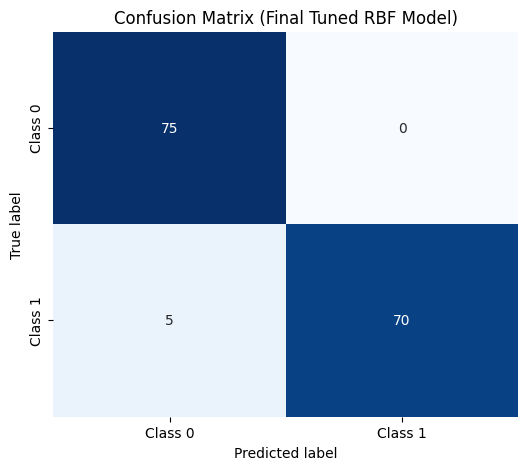

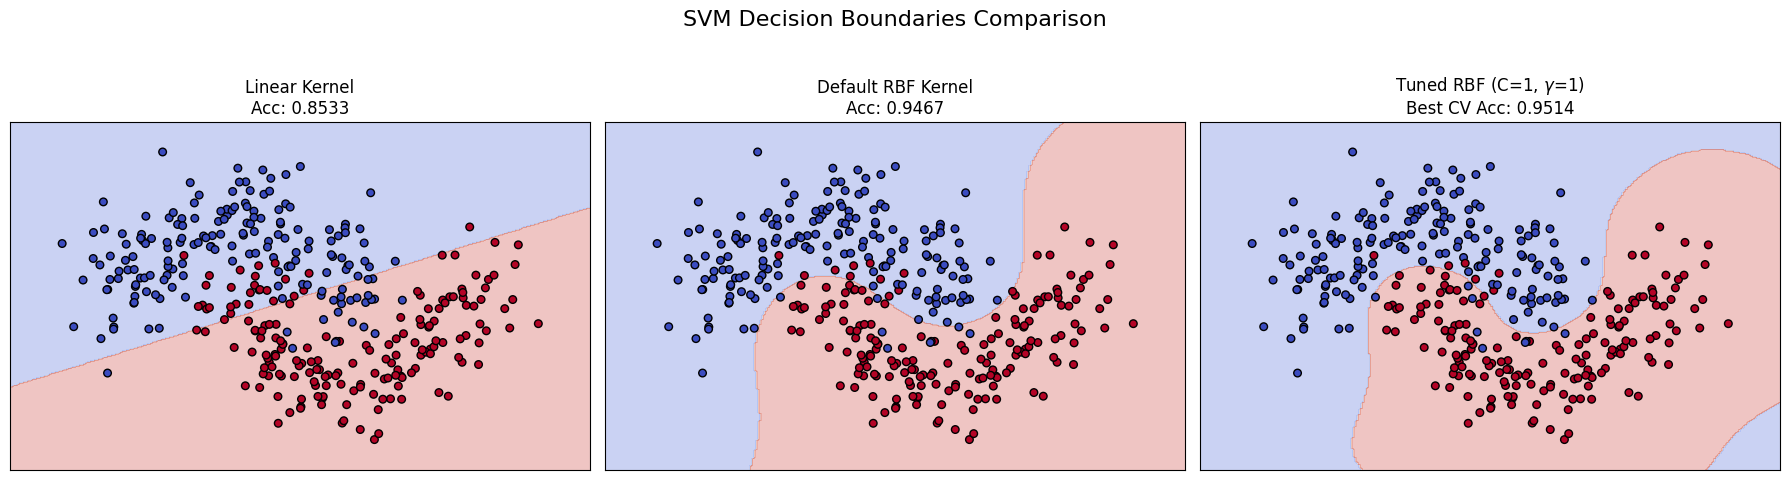

In [6]:
print("\n--- Task 5: Final Evaluation and Visualization ---")

## 1. Evaluate Final Model
# The grid object is already the best model due to refit=True
final_predictions = grid.predict(X_val_scaled)

# Print final classification report and confusion matrix
print(classification_report(y_val, final_predictions))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, final_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix (Final Tuned RBF Model)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## 2. Visualize Decision Boundaries

# Helper function to plot decision boundaries
def plot_decision_boundary(model, X_scaled, y, ax, title):
    # Determine plot limits
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5

    # Create a mesh grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict the class for every point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision regions and data points
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

# Create a 1x3 subplot for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('SVM Decision Boundaries Comparison', fontsize=16)

# 1. Linear Model
plot_decision_boundary(linear_model, X_train_scaled, y_train, axes[0],
                       f"Linear Kernel\nAcc: {model_accuracies['Linear']:.4f}")

# 2. Default RBF Model
plot_decision_boundary(rbf_model, X_train_scaled, y_train, axes[1],
                       f"Default RBF Kernel\nAcc: {model_accuracies['RBF (Default)']:.4f}")

# 3. Final Tuned Grid Model
plot_decision_boundary(grid.best_estimator_, X_train_scaled, y_train, axes[2],
                       f"Tuned RBF (C={best_params['C']}, $\gamma$={best_params['gamma']})\nBest CV Acc: {best_score:.4f}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()